In [1]:
import numpy as np

x_train = np.array([848,960,1563,910,1440,1944,904,936,912]).reshape((-1,1)).astype(np.float32)
y_train = np.array([272,313,342,325,291,351,294,367,279]).reshape((-1,1)).astype(np.float32)
mu = x_train.mean()
sigma = x_train.std()  
x_train = (x_train - mu) / sigma 

x_test = np.array([1650]).reshape((-1,1)).astype(np.float32)
y_test = np.array([335]).reshape((-1,1)).astype(np.float32)
x_test = (x_test - mu) / sigma 

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(9, 1) (9, 1) (1, 1) (1, 1)


In [2]:
lr = 5e-3
epoch = int(1e5)

In [3]:
import tensorflow as tf
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 1)) 
y = tf.placeholder(tf.float32, (None, 1))

init_b = tf.keras.initializers.constant(0.0)
init_w = tf.keras.initializers.VarianceScaling(mode='fan_avg')

b = tf.get_variable('b', (1,), tf.float32, init_b)
w = tf.get_variable('w', (1, 1), tf.float32, init_w)

y_pred = x @ w + b
error = y - y_pred
loss = tf.nn.l2_loss(error)
train = tf.train.RMSPropOptimizer(lr).minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


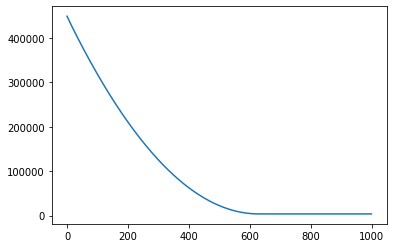

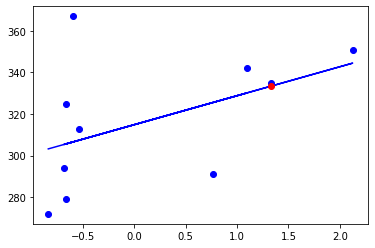

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

with tf.Session() as sess:
    sess.run(init)
    
    loss_trace = []
    for i in range(epoch):
        feed_dict = {x: x_train, y: y_train}
        if i % 100 == 99: 
            _, loss_run = sess.run([train,loss], feed_dict=feed_dict)
            loss_trace.append(loss_run)
        else:
            sess.run(train, feed_dict=feed_dict)
        
    feed_dict = {x: x_train}
    y_train_pred = sess.run(y_pred, feed_dict=feed_dict)
    
    feed_dict = {x: x_test}
    y_test_pred = sess.run(y_pred, feed_dict=feed_dict)

plt.plot(loss_trace)
plt.show()

plt.plot(x_train, y_train, 'ob')
plt.plot(x_train, y_train_pred, '-b')
plt.plot(x_test, y_test, '*r')
plt.plot(x_test, y_test_pred, '*b')
plt.show()

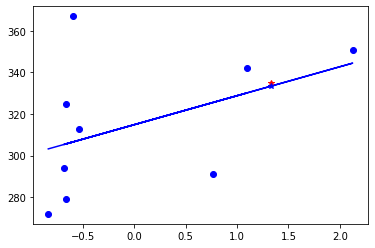

In [7]:
plt.plot(x_train, y_train, 'ob')
plt.plot(x_train, y_train_pred, '-b')
plt.plot(x_test, y_test, '*r')
plt.plot(x_test, y_test_pred, '*b')
plt.show()